In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

In [4]:
df_train = pd.read_csv("Google_Stock_Price_Train.csv")
df_test=pd.read_csv("Google_Stock_Price_Test.csv")

In [5]:
df_train.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"


In [6]:
df_test.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"


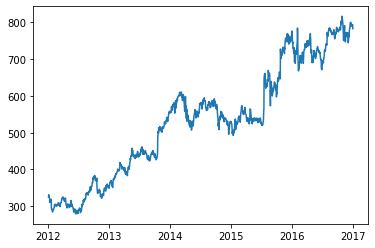

In [7]:
plt.plot(pd.to_datetime(df_train['Date']),df_train['Open'])

In [8]:
df_train['Open']

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_scaled=sc.fit_transform(df_train[['Open']])

In [10]:
x_train = []
y_train = []

In [11]:
for i in range(1198):
    row=X_scaled[i:60+i,0]
    y=X_scaled[i+60,0]
    x_train.append(row)
    y_train.append(y)
x_train,y_train = np.array(x_train),np.array(y_train)

In [12]:
x_train.shape

(1198, 60)

In [13]:
x_train[:2]

array([[0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656],
       [0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.0

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [15]:
x_train=x_train.reshape(1198,60,1)

In [16]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(LSTM(units = 50,return_sequences = False))

In [17]:
regressor.add(Dense(units = 1))

In [18]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [19]:
regressor.fit(x_train,y_train,epochs = 10, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 29s 151ms/step - loss: 0.0365
Epoch 2/10
38/38 [==============================] - 4s 114ms/step - loss: 0.0025
Epoch 3/10
38/38 [==============================] - 4s 114ms/step - loss: 0.0021
Epoch 4/10
38/38 [==============================] - 5s 128ms/step - loss: 0.0021
Epoch 5/10
38/38 [==============================] - 4s 114ms/step - loss: 0.0022
Epoch 6/10
38/38 [==============================] - 4s 114ms/step - loss: 0.0021
Epoch 7/10
38/38 [==============================] - 4s 117ms/step - loss: 0.0020
Epoch 8/10
38/38 [==============================] - 5s 123ms/step - loss: 0.0020
Epoch 9/10
38/38 [==============================] - 4s 114ms/step - loss: 0.0018
Epoch 10/10
38/38 [==============================] - 5s 118ms/step - loss: 0.0017


In [20]:
x_test_scaled=sc.transform(df_test[['Open']])

In [21]:
X=np.vstack([X_scaled[-60:],x_test_scaled])


In [22]:
x_test=[]
for i in range(20):
    row=X[i:60+i,0]
 
    x_test.append(row)

x_test=np.array(x_test)
x_test.shape

(20, 60)

In [23]:
x_test=np.array(x_test)

In [24]:
x_test.shape

(20, 60)

In [25]:
x_test=x_test.reshape(20,60,1)

In [26]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [27]:
yp=regressor.predict(x_test)

1/1 [==============================] - 6s 6s/step


In [28]:
yp

array([[0.956254  ],
       [0.9579193 ],
       [0.9587366 ],
       [0.9588253 ],
       [0.95842886],
       [0.9579023 ],
       [0.95755804],
       [0.9575902 ],
       [0.9581224 ],
       [0.9591931 ],
       [0.96076685],
       [0.9627443 ],
       [0.9649919 ],
       [0.9673867 ],
       [0.9698183 ],
       [0.9723563 ],
       [0.97513664],
       [0.9783413 ],
       [0.9820446 ],
       [0.9860173 ]], dtype=float32)

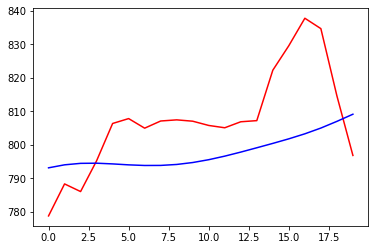

In [29]:
plt.plot(df_test['Open'],c='red')
plt.plot(sc.inverse_transform(yp),c='blue')

In [30]:
sc.inverse_transform(yp)

array([[793.1639 ],
       [794.0591 ],
       [794.4985 ],
       [794.54614],
       [794.333  ],
       [794.0499 ],
       [793.86487],
       [793.8822 ],
       [794.1682 ],
       [794.74384],
       [795.58984],
       [796.65283],
       [797.861  ],
       [799.1484 ],
       [800.4555 ],
       [801.8198 ],
       [803.31445],
       [805.0372 ],
       [807.02783],
       [809.16345]], dtype=float32)

In [31]:
yp[:,0]

array([0.956254  , 0.9579193 , 0.9587366 , 0.9588253 , 0.95842886,
       0.9579023 , 0.95755804, 0.9575902 , 0.9581224 , 0.9591931 ,
       0.96076685, 0.9627443 , 0.9649919 , 0.9673867 , 0.9698183 ,
       0.9723563 , 0.97513664, 0.9783413 , 0.9820446 , 0.9860173 ],
      dtype=float32)

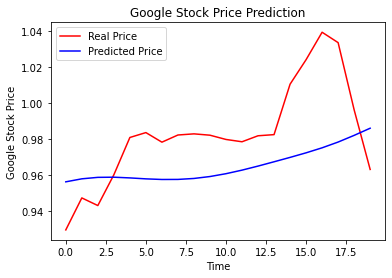

In [33]:
plt.plot(x_test_scaled,color = 'red', label = 'Real Price')
plt.plot(yp[:,0], color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()